In [1]:
# Load specific forecasting and evaluation tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import dates
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy

                     RMS_Value
time                          
2019-11-28 07:00:00   0.984083
2019-11-28 07:01:00   1.246701
2019-11-28 07:02:00   1.004492
2019-11-28 07:03:00   0.979750
2019-11-28 07:04:00   0.886278
2019-11-28 07:05:00   0.905190
2019-11-28 07:06:00   0.959868
2019-11-28 07:07:00   0.948778
2019-11-28 07:08:00   0.988192
2019-11-28 07:09:00   0.951107
2019-11-28 07:10:00   0.927097
2019-11-28 07:11:00   0.923010
2019-11-28 07:12:00   0.962012
2019-11-28 07:13:00   0.948916
2019-11-28 07:14:00   0.865217
2019-11-28 07:15:00   0.963713
2019-11-28 07:16:00   0.915931
2019-11-28 07:17:00   0.922979
2019-11-28 07:18:00   0.935591
2019-11-28 07:19:00   0.933210


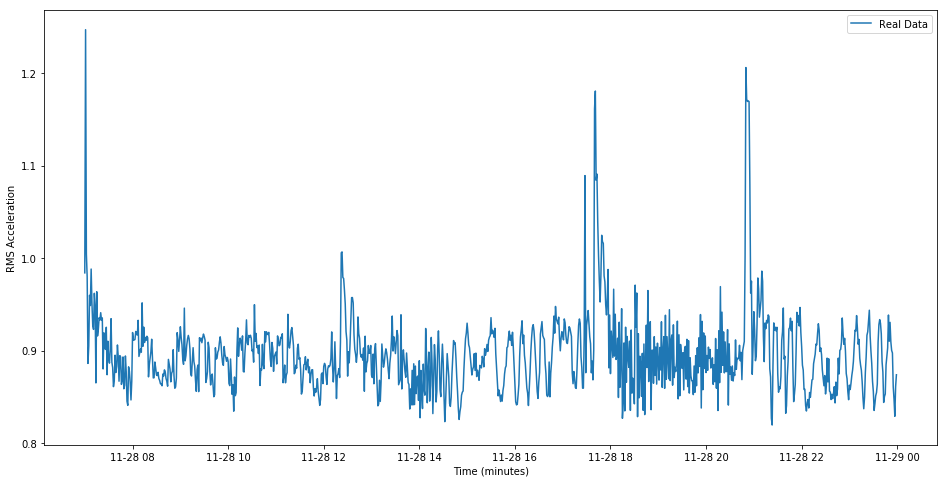

In [2]:
# Multiple out of sample forecast
# Load the data 
df = pd.read_excel('TestData1DFull_1m.xls', header=0, index_col=0, parse_dates= True)
# display first few rows
print(df.head(20))
# line plot of dataset
plt.figure(figsize=(16,8))
plt.plot(df['RMS_Value'], label = 'Real Data')
plt.ylabel('RMS Acceleration')
plt.xlabel('Time (minutes)')
plt.legend(loc='best')
plt.show()


In [3]:
train = df[:960]
test = df[960:]

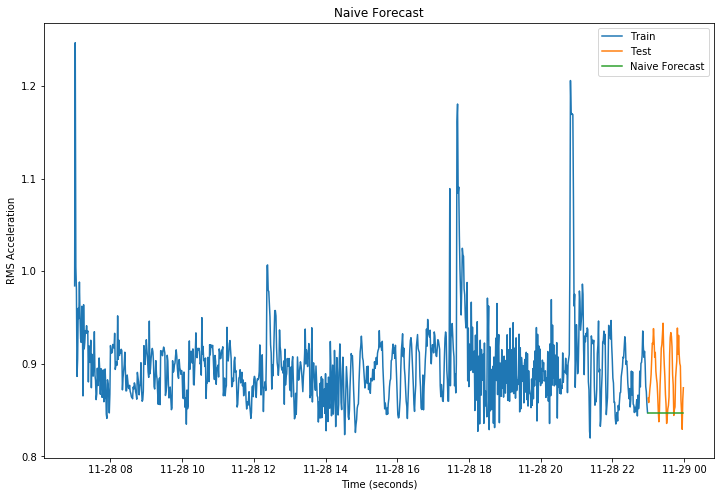

In [4]:
#Naive Approach
dd= np.asarray(train['RMS_Value'])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['RMS_Value'], label='Train')
plt.plot(test.index,test['RMS_Value'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.xlabel("Time (seconds)")
plt.ylabel("RMS Acceleration")
plt.show()

In [5]:
rms = sqrt(mean_squared_error(test['RMS_Value'], y_hat.naive))
print(rms)



0.05077366482396776


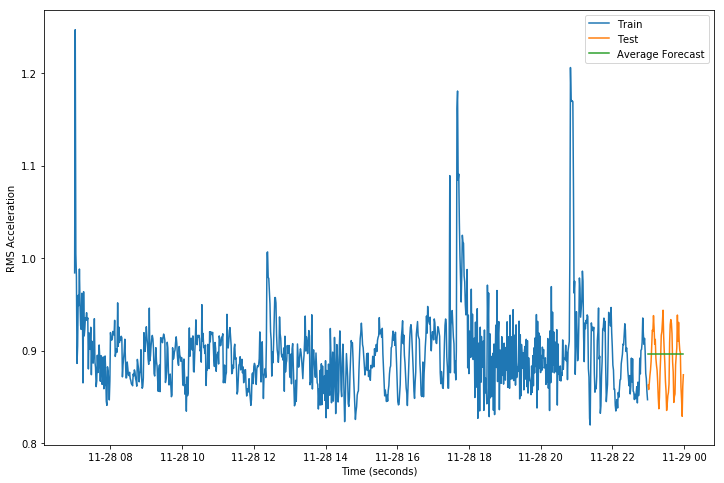

In [6]:
#Simple Average
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['RMS_Value'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['RMS_Value'], label='Train')
plt.plot(test['RMS_Value'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.xlabel("Time (seconds)")
plt.ylabel("RMS Acceleration")
plt.show()


In [7]:
rms = sqrt(mean_squared_error(test['RMS_Value'], y_hat_avg.avg_forecast))
print(rms)


0.032173152304294975


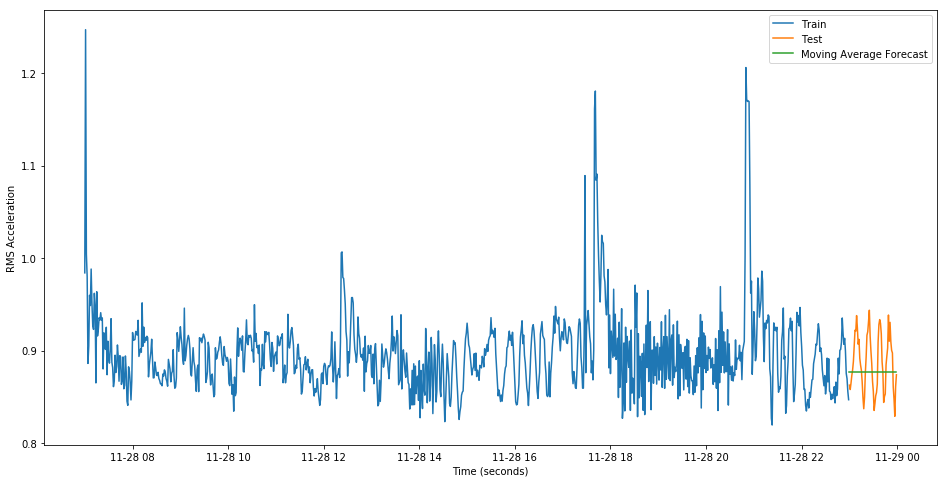

In [8]:
#Moving Average
y_hat_avg['moving_avg_forecast'] = train['RMS_Value'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['RMS_Value'], label='Train')
plt.plot(test['RMS_Value'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.xlabel("Time (seconds)")
plt.ylabel("RMS Acceleration")
plt.show()



In [9]:
rms = sqrt(mean_squared_error(test['RMS_Value'], y_hat_avg.moving_avg_forecast))
print(rms)


0.032703942518870904


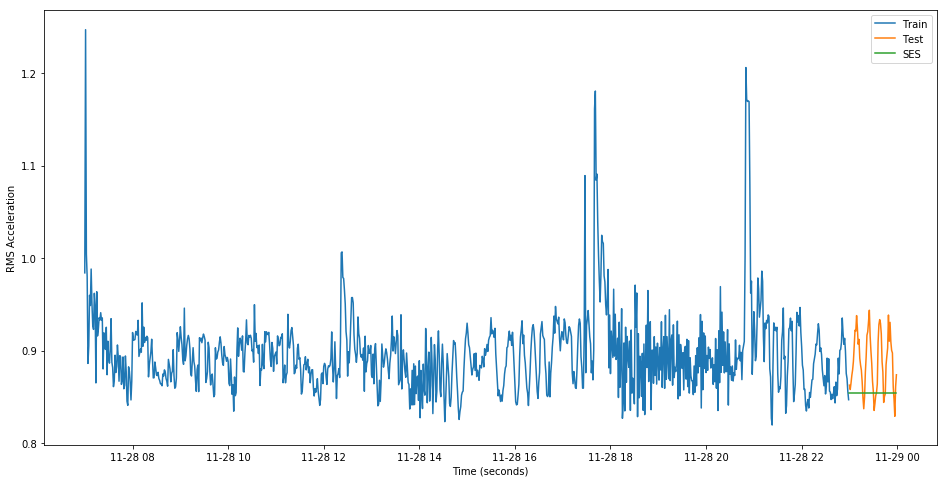

In [10]:
#Simple Exponential Smoothing Average
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit2 = SimpleExpSmoothing(np.asarray(train['RMS_Value'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['RMS_Value'], label='Train')
plt.plot(test['RMS_Value'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.xlabel("Time (seconds)")
plt.ylabel("RMS Acceleration")
plt.show()


In [11]:
rms = sqrt(mean_squared_error(test['RMS_Value'], y_hat_avg.SES))
print(rms)



0.04549665442430266
